In [26]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [35]:
#LOAD DATASET
df = pd.read_csv(r"C:\Users\LENOVO\merged.csv")

In [33]:
#BASIC DATA EXPLORATION
df.shape
df.info()
df.isnull().sum()

age                                                                                                                                                                                                                 0
gender                                                                                                                                                                                                              0
year of study                                                                                                                                                                                                       0
monthly budget for personal expenses (₹)                                                                                                                                                                            0
do you currently own a laptop or smartphone suitable for your studies?                                                                          

In [34]:
#DATA CLEANING & COLUMN RENAMING
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['age', 'gender', 'year_of_study',
       'monthly_budget_for_personal_expenses_(₹)',
       'do_you_currently_own_a_laptop_or_smartphone_suitable_for_your_studies?',
       'how_old_is_your_current_primary_device_(laptop/phone)?',
       'which_product_are_you_most_likely_to_purchase_in_the_next_6_months?',
       'how_urgently_do_you_need_this_product?',
       'your_main_reason_for_purchasing_the_product:',
       'preferred_budget_range_for_the_product:',
       'preferred_brand_/_platform:',
       'how_important_are_the_following_factors_when_buying?\nlist_the_factors:\nproduct_price\nbrand_reputation\nfeatures/specifications\nbattery_life\ndesign_&_look\nreviews_&_ratings\nwarranty/service_availability',
       'how_often_do_you_buy_electronic_products_online?',
       'which_apps/websites_do_you_trust_for_buying_products?',
       'hours_of_screentime_per_day:',
       'do_you_compare_products_before_buying?',
       'are_you_planning_to_purchase_a_new_product_within_the_

In [27]:
#DEFINE TARGET VARIABLE
target_col = "are_you_planning_to_purchase_a_new_product_within_the_next_6_months?"
df[target_col] = df[target_col].map({"Yes": 1, "No": 0})

#ENCODE CATEGORICAL FEATURES
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

#FEATURE & TARGET SPLIT
X = df.drop(target_col, axis=1)
y = df[target_col]


In [28]:
#MODELS
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [29]:
#TRAIN & TEST SPLITS WITH SEPARATED OUTPUT
test_sizes = [0.15, 0.20, 0.25, 0.30]

for size in test_sizes:
    print("\n" + "="*60)
    print(f"TRAIN–TEST SPLIT: {int((1-size)*100)}% TRAIN / {int(size*100)}% TEST")
    print("="*60)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=size,
        random_state=42,
        stratify=y
    )

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n{name}")
        print("-"*40)
        print("Accuracy :", round(accuracy_score(y_test, y_pred)*100, 2), "%")
        print("Precision:", round(precision_score(y_test, y_pred), 2))
        print("Recall   :", round(recall_score(y_test, y_pred), 2))
        print("F1 Score :", round(f1_score(y_test, y_pred), 2))



TRAIN–TEST SPLIT: 85% TRAIN / 15% TEST

Logistic Regression
----------------------------------------
Accuracy : 57.14 %
Precision: 0.61
Recall   : 0.85
F1 Score : 0.71

Decision Tree
----------------------------------------
Accuracy : 59.52 %
Precision: 0.68
Recall   : 0.65
F1 Score : 0.67

Random Forest
----------------------------------------
Accuracy : 63.1 %
Precision: 0.64
Recall   : 0.9
F1 Score : 0.75

TRAIN–TEST SPLIT: 80% TRAIN / 20% TEST

Logistic Regression
----------------------------------------
Accuracy : 59.46 %
Precision: 0.62
Recall   : 0.9
F1 Score : 0.73

Decision Tree
----------------------------------------
Accuracy : 48.65 %
Precision: 0.58
Recall   : 0.57
F1 Score : 0.58

Random Forest
----------------------------------------
Accuracy : 61.26 %
Precision: 0.64
Recall   : 0.84
F1 Score : 0.73

TRAIN–TEST SPLIT: 75% TRAIN / 25% TEST

Logistic Regression
----------------------------------------
Accuracy : 58.27 %
Precision: 0.62
Recall   : 0.86
F1 Score : 0.72

Dec


CONFUSION MATRIX (Random Forest – 25% TEST)
[[13 40]
 [13 73]]


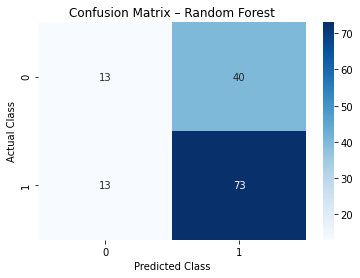

In [30]:
#CONFUSION MATRIX (FINAL MODEL – 25%)
print("\n" + "="*60)
print("CONFUSION MATRIX (Random Forest – 25% TEST)")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix – Random Forest")
plt.show()



Top 10 Important Features:
which_product_are_you_most_likely_to_purchase_in_the_next_6_months?                                                                                                                                                 0.085728
how_important_are_the_following_factors_when_buying?\nlist_the_factors:\nproduct_price\nbrand_reputation\nfeatures/specifications\nbattery_life\ndesign_&_look\nreviews_&_ratings\nwarranty/service_availability    0.079664
age                                                                                                                                                                                                                 0.079226
preferred_budget_range_for_the_product:                                                                                                                                                                             0.078501
preferred_brand_/_platform:                                                             

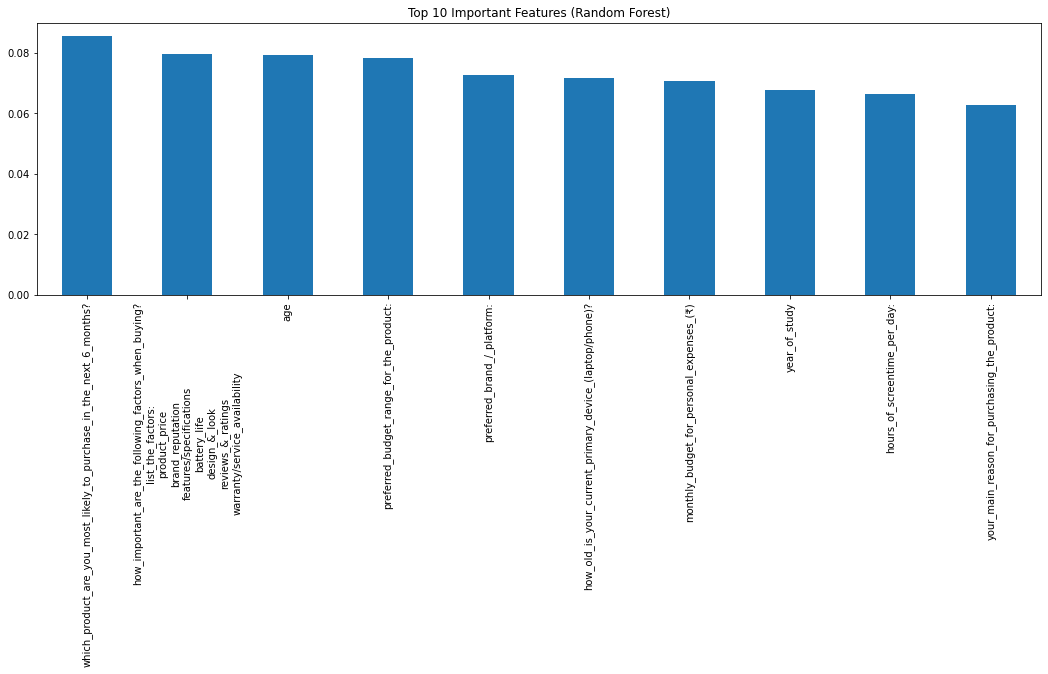

In [31]:
#FEATURE IMPORTANCE
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(18,5))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


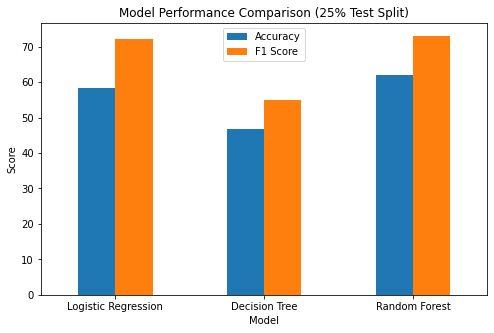

In [37]:
#MODEL COMPARISON (BAR CHART)
#Performance Comparison of Machine Learning Models (25% Test Split)
data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [58.27, 46.76, 61.87],
    "F1 Score": [72, 55, 73]
}

df_plot = pd.DataFrame(data)

df_plot.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison (25% Test Split)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


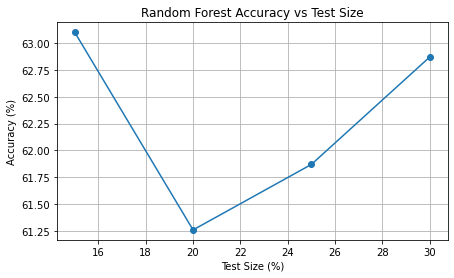

In [38]:
#ACCURACY VS TEST SIZE (LINE GRAPH)
#Random Forest Accuracy Across Different Train–Test Splits
test_sizes = [15, 20, 25, 30]
rf_accuracy = [63.10, 61.26, 61.87, 62.87]

plt.figure(figsize=(7,4))
plt.plot(test_sizes, rf_accuracy, marker='o')
plt.title("Random Forest Accuracy vs Test Size")
plt.xlabel("Test Size (%)")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()
